In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
all_rates = np.zeros(350)

for file in os.listdir("/cr/tempdata01/filip/SSDCalib/T1Rates/RadioCut"):
    try:
        all_rates += np.loadtxt("/cr/tempdata01/filip/SSDCalib/T1Rates/RadioCut/" + file)
    except FileNotFoundError: pass

def background(x):
    return A * np.exp(-mu * (x-x_min))
 
x_min, x_max = np.argmin(np.diff(all_rates)) + 5, 100
A = all_rates[x_min]
mu = -np.log(all_rates[x_max] / A) / (x_max - x_min)
residuals = all_rates[x_min:x_max] - background(np.arange(x_min,x_max,1))

MIP determined as: 44.70362845461478


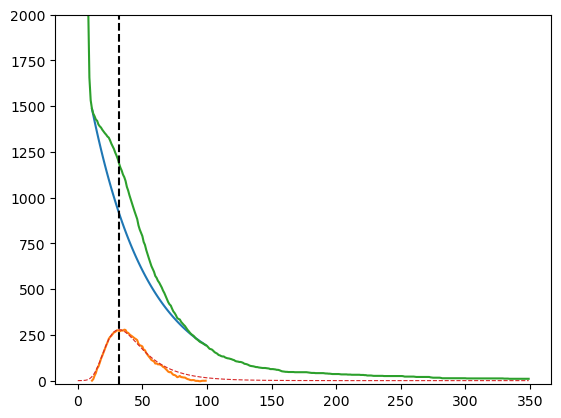

In [26]:
plt.plot(range(x_min, x_max), background(np.arange(x_min, x_max, 1)))
plt.plot(range(x_min, x_max), residuals)
plt.plot(range(350), all_rates)
#plt.yscale("log")

import scipy.stats as stats

dist = stats.moyal(loc=32, scale=10)
factor = max(residuals) / max(dist.pdf(range(350)))

plt.plot(range(350), factor*dist.pdf(range(350)), ls='--', lw=0.8)
plt.axvline(32, c='k', ls='--')
_ = plt.ylim(-20,2000)
#plt.yscale('log')

print("MIP determined as:", dist.mean())


### does above reconstruction work only for a single file?

In [ ]:
all_rates = np.loadtxt("/cr/tempdata01/filip/SSDCalib/T1Rates/RadioCut/SSD_rates_T1_0001.dat")

def background(x):
    return A * np.exp(-mu * (x-x_min))
 
x_min, x_max = np.argmin(np.diff(all_rates)) + 5, 100
A = all_rates[x_min]
mu = -np.log(all_rates[x_max] / A) / (x_max - x_min)
residuals = all_rates[x_min:x_max] - background(np.arange(x_min,x_max,1))

plt.plot(range(x_min, x_max), background(np.arange(x_min, x_max, 1)))
plt.plot(range(x_min, x_max), residuals)
plt.plot(range(350), all_rates)
#plt.yscale("log")

import scipy.stats as stats

popt = stats.moyal.fit(residuals)
plt.axvline(popt[0], c='k', ls='--')
print(popt[0])

### No.